### Imported the relevant libraries

In [44]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import svm


In [2]:
insurance_data = pd.read_excel("C:/Users/TruptiJadhav/Downloads/insurance_data.xlsx")
insurance_data.head()

index  age  claim0  claim1  claim2  claim3    claims  cover_addon0  cover_addon1  cover_addon2  cover_addon3  cover_addon4  cover_addon5  cover_addon6  cover_addon7  cover_level       date  duration  excess  family_status  gender  geo0  geo1  geo2  geo3   geo4   geo5      geo6      geo7      geo8  payment_freq  payment_type    premium  sales_channel0  sales_channel1  underwriting  vitality0  vitality1  vitality10  vitality11  vitality12  vitality2  vitality3  vitality3.1  vitality4  vitality5  vitality6  vitality7  vitality8  vitality9  label
0  ##4lM2q#SP   40       0       0       0       0       NaN             0             0           0.0           0.0           NaN           NaN           NaN           NaN            0 2019-04-01         7       0              0       0   0.0   0.0   0.0  26.0   2.43  14.46  0.431895  2.105140  0.949866             0             0  20.580782               0               0             0        0.0          1         NaN         NaN       313.0          0          1         33.0        6.0       66.0        9.0        NaN        NaN        NaN  False
1  ##Hm9NEa74   72       0       0       0       0       NaN             0             0           NaN           NaN           NaN           NaN           NaN           NaN            0 2019-06-01        26       0              0       0   1.0   1.0   1.0  22.0   5.45  22.41  1.384005 -0.948000  0.007980             1             0  14.575759               1               0             1        NaN          0         NaN         NaN         NaN          0          1          NaN        NaN        NaN        NaN        NaN        NaN        NaN  False
2  ##Q04ixOve   59       0       0       0       0       NaN             0             1           NaN           1.0           0.0           NaN           NaN           NaN            0 2019-06-01         2       1              0       1   2.0   2.0   2.0  16.0  48.82  62.63  0.805653 -0.074172  2.713296             0             0  15.350519               2               1             1        NaN          0         NaN         NaN         NaN          0          1          0.0        NaN        2.0      363.0        NaN        NaN        NaN  False
3  ##S#opLpH@   50       0       0       0       0  22.45269             0             0           NaN           1.0           0.0           0.0           NaN           NaN            0 2018-07-01        22       0              1       1   0.0   2.0   NaN   NaN   4.18   4.61  1.325894  0.051749  1.925388             1             1  24.533815               1               0             0        0.0          0         NaN         NaN        50.0          0          1         14.0        0.0        0.0        NaN        NaN        NaN        NaN  False
4  ##iQDuH0kz   55       0       0       0       0       NaN             0             1           NaN           0.0           0.0           NaN           NaN           NaN            1 2018-07-01         1       1              0       1   3.0   0.0   3.0  30.0   3.95   3.16  0.556007  2.372585  0.356030             0             0  12.471525               3               1             1        NaN          1         NaN         NaN       200.0          0          1          0.0        NaN        0.0        NaN        NaN        NaN        NaN  False

#### Data Exploration: Observations:
     Data has 51 columns 1) Date Variable - it is One year data July2018 till June2019 - captured at the start of the every month for 12 months for 50000 customers.
    2) age,gender,family_status- demographic variables,  Geo1,geo2..Geo8 - geographical variable, 
    3) Vitality 3 variable is appearing twice in the data, but with different same data , hence renamed one of the variables.
    4) Vitality1-Vitality3 - looks flag variables(yes/no) - may be wellness variables
    5) vitality 3.1 to vitality-12 - derived continous variables , they look to be  number of days in the calender ranging from 0-354/355-  so could be number of days in a quarter from last claim?
    6)  Vitality 12 is higher number so may be number of days since last claim or something..
    7) underwriting, saleschannel0 and saleschannel1 categorical, claim0-claim3 looks like flag variable (yes/no), cover_addon0-7  categorical variables
    8)cover_level -Categorical,duration -Continuos ,	excess - Flag variable
    9) payment frequency - 0- may be one time purchased product, 1 once in year, 2 twice a year
    10) Payment type -categorical 0,1,2  
 #### Evaluate whether the data needs cleaning; your model is only as good as the data it's given. 

In [3]:
insurance_data.rename(columns={'vitality3.1':'vitality3_1'}, inplace=True)

In [52]:
insurance_data.describe(include=[np.number])

age        claim0        claim1        claim2        claim3       claims  cover_addon0  cover_addon1  cover_addon2  cover_addon3  cover_addon4  cover_addon5  cover_addon6  cover_addon7  cover_level      duration        excess  family_status        gender          geo0          geo1          geo2          geo3          geo4          geo5          geo6          geo7          geo8  payment_freq  payment_type       premium  sales_channel0  sales_channel1  underwriting    vitality0     vitality1   vitality10    vitality11    vitality12     vitality2     vitality3   vitality3_1    vitality4     vitality5     vitality6    vitality7    vitality8    vitality9
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000  9514.000000       50000.0  50000.000000       14025.0  43517.000000  27289.000000   7518.000000   5498.000000        5407.0  50000.00000  50000.000000  50000.000000   50000.000000  50000.000000  48903.000000  48979.000000  44409.000000  45524.000000  48956.000000  48956.000000  49747.000000  49747.000000  49747.000000  50000.000000  50000.000000  49995.000000    50000.000000    50000.000000   50000.00000  9393.000000  50000.000000  9163.000000  11993.000000  23592.000000  50000.000000  50000.000000  25668.000000  8712.000000  25668.000000  17043.000000  9981.000000  9981.000000  9163.000000
mean      48.947380      0.024020      0.003640      0.005900      0.000160    12.507766           0.0      0.749640           0.0      1.060321      0.096779      0.391194      0.103128           0.0      0.91116      5.294520      0.659440       0.893480      0.430900      2.633233      4.050859      2.765003     26.029259      7.674783      6.559239      0.461579      0.499695     -0.180182      0.074160      0.036000     18.694098      127.096240        0.540400       1.05946     0.182157      0.397580    86.569573      2.777370    644.948330      0.101020      0.833560     19.292193    46.534091     75.237027     37.528663    23.987176    31.611662     7.986795
std       15.446134      0.153113      0.060223      0.076585      0.012648    17.196740           0.0      0.433225           0.0      0.912812      0.295662      0.488050      0.319327           0.0      0.99477      6.561994      0.473902       1.192611      0.495207      2.456175      3.129960      1.970940      7.442254     15.813201      8.856839      0.835104      1.117145      0.915235      0.275358      0.239635     12.781595      347.390969        0.567991       1.12518     0.385994      0.489403    90.892599      0.825481    536.801823      0.301358      0.372479     41.752773    79.165039     92.472255     72.805733    15.261956    62.593018     9.817509
min      -81.000000      0.000000      0.000000      0.000000      0.000000     0.000000           0.0      0.000000           0.0      0.000000      0.000000      0.000000      0.000000           0.0      0.00000    -19.000000      0.000000       0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.020000      0.010000     -2.121226     -1.955380     -2.933191      0.000000      0.000000    -27.364533        0.000000        0.000000       0.00000     0.000000      0.000000     0.000000      2.000000      1.000000      0.000000      0.000000      0.000000     0.000000      0.000000      0.000000     1.000000     0.000000     1.000000
25%       36.000000      0.000000      0.000000      0.000000      0.000000     0.000000           0.0      0.000000           0.0      0.000000      0.000000      0.000000      0.000000           0.0      0.00000      1.000000      0.000000       0.000000      0.000000      0.000000      1.000000      1.000000     21.000000      1.830000      1.380000     -0.108328     -0.382994     -0.852447      0.000000      0.000000     13.522908        0.000000        0.000000       0.00000     0.000000      0.000000    14.000000      2.000000    200.000000      0.000000      1.000000      0.000000     1.000000      0.000000      0.000000    11

  ####  age - Min -81, max 159- if this is age of customer these are outliers, hence remove using +-3 standard deviation rule.There are quite a few missing values in the data set. But  we just do not drop variables , as long as we know they are not going to get populated properly in future too, or not very reliable to use .

In [5]:
df=insurance_data[((insurance_data.age - insurance_data.age.mean()) / insurance_data.age.std()).abs() < 3]

In [6]:
print(df.shape)

(49979, 51)


In [7]:
df.describe(include=[np.number])
#print(df.info())

age        claim0        claim1        claim2        claim3       claims  cover_addon0  cover_addon1  cover_addon2  cover_addon3  cover_addon4  cover_addon5  cover_addon6  cover_addon7   cover_level      duration        excess  family_status        gender          geo0          geo1          geo2          geo3          geo4          geo5          geo6          geo7          geo8  payment_freq  payment_type       premium  sales_channel0  sales_channel1  underwriting    vitality0     vitality1   vitality10    vitality11    vitality12     vitality2     vitality3   vitality3_1    vitality4     vitality5     vitality6    vitality7    vitality8    vitality9
count  49979.000000  49979.000000  49979.000000  49979.000000  49979.000000  9509.000000       49979.0  49979.000000       14022.0  43501.000000  27280.000000   7516.000000   5496.000000        5405.0  49979.000000  49979.000000  49979.000000   49979.000000  49979.000000  48884.000000  48958.000000  44391.000000  45505.000000  48935.000000  48935.000000  49726.000000  49726.000000  49726.000000  49979.000000  49979.000000  49974.000000    49979.000000    49979.000000  49979.000000  9393.000000  49979.000000  9163.000000  11992.000000  23589.000000  49979.000000  49979.000000  25665.000000  8712.000000  25665.000000  17040.000000  9980.000000  9980.000000  9163.000000
mean      48.952620      0.024030      0.003642      0.005902      0.000160    12.511392           0.0      0.749715           0.0      1.060412      0.096738      0.391299      0.103166           0.0      0.911203      5.293243      0.659537       0.893355      0.430801      2.633316      4.050227      2.765178     26.029140      7.671485      6.557768      0.461558      0.499760     -0.180332      0.074091      0.036015     18.691386      127.061106        0.540347      1.059465     0.182157      0.397707    86.569573      2.777268    644.975031      0.101062      0.833610     19.294448    46.534091     75.232496     37.529519    23.984970    31.614629     7.986795
std       15.328162      0.153144      0.060236      0.076601      0.012651    17.199811           0.0      0.433182           0.0      0.912886      0.295605      0.488073      0.319379           0.0      0.994844      6.561484      0.473870       1.192517      0.495193      2.456171      3.129728      1.970966      7.441815     15.806470      8.856513      0.835195      1.117094      0.915238      0.275257      0.239685     12.782387      347.310233        0.567882      1.125266     0.385994      0.489429    90.892599      0.825440    536.817580      0.301414      0.372434     41.754692    79.165039     92.463814     72.809533    15.261129    62.595452     9.817509
min       18.000000      0.000000      0.000000      0.000000      0.000000     0.000000           0.0      0.000000           0.0      0.000000      0.000000      0.000000      0.000000           0.0      0.000000    -19.000000      0.000000       0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.020000      0.010000     -2.121226     -1.955380     -2.933191      0.000000      0.000000    -27.364533        0.000000        0.000000      0.000000     0.000000      0.000000     0.000000      2.000000      1.000000      0.000000      0.000000      0.000000     0.000000      0.000000      0.000000     1.000000     0.000000     1.000000
25%       36.000000      0.000000      0.000000      0.000000      0.000000     0.000000           0.0      0.000000           0.0      0.000000      0.000000      0.000000      0.000000           0.0      0.000000      1.000000      0.000000       0.000000      0.000000      0.000000      1.000000      1.000000     21.000000      1.830000      1.380000     -0.108328     -0.382994     -0.853050      0.000000      0.000000     13.522201        0.000000        0.000000      0.000000     0.000000      0.000000    14.000000      2.000000    200.000000      0.000000      1.000000      0.000000     1.000000      0.000000      0.000000

C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


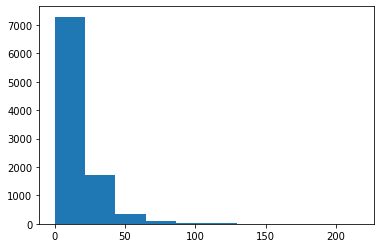

In [8]:
plt.hist(insurance_data.claims, 10)
plt.show()

 ###  Vitality0-Vitality3 - looks flag variables(yes/no),but many values are missing. In realy world, the data provider's /SME's discussion help to understand the data,outliers  and logic development for missing values imputation.But here , as this discussion could not happen, I have safely used mode. 
    

In [9]:
df.isnull().sum()

index                 0
age                   0
claim0                0
claim1                0
claim2                0
claim3                0
claims            40470
cover_addon0          0
cover_addon1          0
cover_addon2      35957
cover_addon3       6478
cover_addon4      22699
cover_addon5      42463
cover_addon6      44483
cover_addon7      44574
cover_level           0
date                  0
duration              0
excess                0
family_status         0
gender                0
geo0               1095
geo1               1021
geo2               5588
geo3               4474
geo4               1044
geo5               1044
geo6                253
geo7                253
geo8                253
payment_freq          0
payment_type          0
premium               5
sales_channel0        0
sales_channel1        0
underwriting          0
vitality0         40586
vitality1             0
vitality10        40816
vitality11        37987
vitality12        26390
vitality2       

In [10]:
df.fillna(df.vitality0.mode().iloc[0], inplace=True)
df.fillna(df.vitality10.mode().iloc[0], inplace=True)
df.fillna(df.vitality12.mode().iloc[0], inplace=True)
df.fillna(df.vitality11.mode().iloc[0], inplace=True)
df.fillna(df.vitality4.mode().iloc[0], inplace=True)
df.fillna(df.vitality3_1.mode().iloc[0], inplace=True)
df.fillna(df.vitality5.mode().iloc[0], inplace=True)
df.fillna(df.vitality6.mode().iloc[0], inplace=True)
df.fillna(df.vitality7.mode().iloc[0], inplace=True)
df.fillna(df.vitality8.mode().iloc[0], inplace=True)

C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


  ###  Would not replace any other columns given its meaning is not clear to me.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249588501C8>,
      dtype=object)

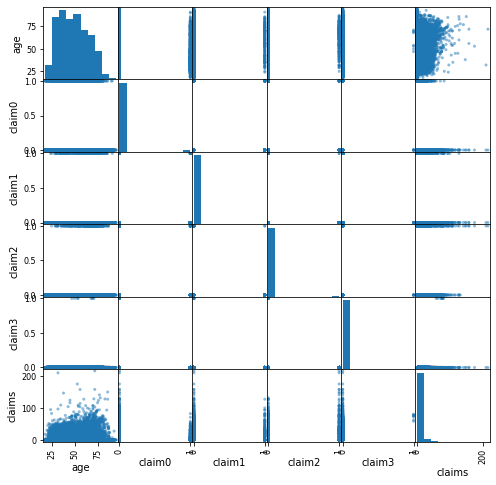

In [11]:
pd.plotting.scatter_matrix(df.loc[:,'age':'claims'],figsize=(8,8))

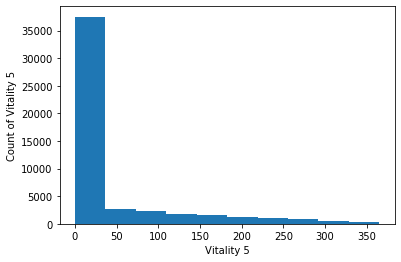

In [51]:
fig, ax = plt.subplots()
#for i in insurance_data.columns:
ax.hist(x = df['vitality5'])
#ax.bar(x = df['vitality5'] , y = df['vitality5'].count())
plt.xlabel("Vitality 5")
plt.ylabel("Count of Vitality 5")
plt.show()


Next we'll convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (exlcude identity,date,) and another array that contains the classes (label).

In [13]:
all_features = df[['age', 'claim0', 'claim1', 'claim2', 'claim3','claims','cover_addon0', 'cover_addon1', 'cover_addon2', 
'cover_addon3', 'cover_addon4','cover_addon5',  'cover_addon6', 'cover_addon7',  'cover_level', 'duration', 'excess',
'family_status', 'gender', 'geo0', 'geo1', 'geo2','geo3', 'geo4', 'geo5', 'geo6','geo7', 'geo8','payment_freq','payment_type',
'premium',  'sales_channel0','sales_channel1', 'underwriting', 'vitality0','vitality1', 'vitality10', 'vitality11',  'vitality12', 
'vitality2', 'vitality3', 'vitality3_1', 'vitality4', 'vitality5','vitality6','vitality7', 'vitality8',  'vitality9']].values


all_classes = df['label'].values

feature_names = ['age', 'claim0', 'claim1', 'claim2', 'claim3','claims','cover_addon0', 'cover_addon1', 'cover_addon2', 
'cover_addon3', 'cover_addon4','cover_addon5',  'cover_addon6', 'cover_addon7',  'cover_level', 'duration', 'excess',
'family_status', 'gender', 'geo0', 'geo1', 'geo2','geo3', 'geo4', 'geo5', 'geo6','geo7', 'geo8','payment_freq','payment_type',
'premium',  'sales_channel0','sales_channel1', 'underwriting', 'vitality0','vitality1', 'vitality10', 'vitality11',  
'vitality12', 'vitality2', 'vitality3', 'vitality3_1', 'vitality4', 'vitality5', 'vitality6','vitality7', 'vitality8',  'vitality9']

all_features

array([[40.,  0.,  0., ...,  0.,  0.,  0.],
       [72.,  0.,  0., ...,  0.,  0.,  0.],
       [59.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [66.,  0.,  0., ...,  0.,  0.,  0.],
       [36.,  0.,  0., ..., 31.,  2., 13.],
       [36.,  0.,  0., ..., 42., 18., 11.]])

Some of our models require the input data to be normalized, so normalized the attribute data. 

In [14]:
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[-0.58406937, -0.15691321, -0.06045526, ..., -0.40705697,
        -0.20568108, -0.28066137],
       [ 1.50361219, -0.15691321, -0.06045526, ..., -0.40705697,
        -0.20568108, -0.28066137],
       [ 0.65549155, -0.15691321, -0.06045526, ..., -0.40705697,
        -0.20568108, -0.28066137],
       ...,
       [ 1.1121719 , -0.15691321, -0.06045526, ..., -0.40705697,
        -0.20568108, -0.28066137],
       [-0.84502957, -0.15691321, -0.06045526, ...,  2.22766464,
        -0.14051925,  2.21108221],
       [-0.84502957, -0.15691321, -0.06045526, ...,  3.16256586,
         0.38077538,  1.82773705]])

Before moving to model development and validation , train/test split the data. 75% for training, and 25% for testing.

In [15]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

In [16]:
print(training_inputs.shape)

(37484, 48)


## Decision Trees

In [ ]:
clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.242455 to fit



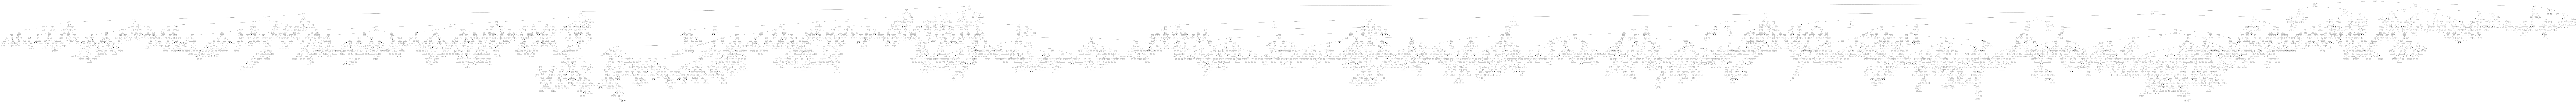

In [18]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### accuracy of the resulting decision tree model using test data.

In [19]:
clf.score(testing_inputs, testing_classes)

0.8464185674269707

## Logistic Regression and accuracy of the resulting decision tree model using test data.
With 10 class fold classification


In [23]:
clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

0.9040597059634805

## Neural Networks

In [42]:
def create_model():
    model = Sequential()
    #48 feature inputs going into an 6-unit layer 
    model.add(Dense(6, input_dim=48, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (True or False)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()


0.9053802967071534

## SVM

In [45]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [48]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\

0.9048600100835291

In [49]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TruptiJadhav\Anaconda3\lib\site-packages\sklearn\

0.9048600100835291


### Accuracy using 
    Decision Tree -> 0.8464185674269707
    Logistic Regression with 10 fold cross validation ->0.9040597059634805
    Neural Network-> 0.9053802967071534
    SVM with linear kernel 10 fold cross validation-> 0.9048600100835291
    SVM with rbf kernel 10 fold cross validation -> 0.9048600100835291
    
    SVM model accuarcy is almost similar to Logistic regression  but it took long time to get trained and scored.
    Naive bayes,different kernel for SVM , KNN could also be tried for this problem, but as data is very small,any deep learning algorithm need not be used for the same.
    
    Looks like simple logistic regression is working well giving 90% accuracy on the testing split.
    
    So choosing logistic regression model among all models will be better decision.
    